# Data Cleaning & Exploration

_Erin Cameron_

---

## 1) Setup

In [1]:
# Import statements required for data cleaning and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Formatting settings for the environment
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) # To prevent truncation of long cell content

In [3]:
# Read in the dataset
df = pd.read_csv('data/data.csv', sep=';', encoding='windows-1252')

In [4]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

In [5]:
# Investigate the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

In [7]:
# Display the dataset for an initial view
display(df.head(10))

Group  Sex  Age  Patients number per hour  Arrival mode  Injury  \
0      2    2   71                         3             3       2   
1      1    1   56                        12             3       2   
2      2    1   68                         8             2       2   
3      1    2   71                         8             1       1   
4      1    2   58                         4             3       1   
5      2    1   54                         6             4       1   
6      2    2   49                        11             3       1   
7      1    2   78                        14             3       1   
8      1    2   32                        10             3       1   
9      2    1   38                         6             3       1   

          Chief_complain  Mental  Pain NRS_pain  SBP  DBP   HR  RR    BT  \
0      right ocular pain       1     1        2  160  100   84  18  36.6   
1     right forearm burn       1     1        2  137   75   60  20  36.5   
2           arm pain, Lt       1     1        2  130   80  102  20  36.6   
3        ascites tapping       1     1        3  139   94   88  20  36.5   
4        distension, abd       1     1        3   91   67   93  18  36.5   
5                  fever       1     1        3  140   90   94  20  38.1   
6  With chest discomfort       1     1        3  110   70   70  20  36.2   
7            pain, chest       1     1        3  169   86   80  20    36   
8    LBP - Low back pain       1     1        3  140   75   91  20  36.6   
9         Eczema, Eyelid       1     1        3  130   80   80  20  36.3   

  Saturation  KTAS_RN  \
0        100        2   
1        NaN        4   
2         98        4   
3        NaN        4   
4        NaN        4   
5         98        3   
6         98        2   
7        NaN        2   
8        NaN        4   
9         97        4   

                                             Diagnosis in ED  Disposition  \
0                                           Corneal abrasion            1   
1                          Burn of hand, firts degree dorsum            1   
2               Fracture of surgical neck of humerus, closed            2   
3                     Alcoholic liver cirrhosis with ascites            1   
4                                                    Ascites            1   
5                                         Fever, unspecified            2   
6                               Angina pectoris, unspecified            1   
7                                    Acute coronary syndrome            1   
8  Herniated disc disease of lumbar spine with radiculopathy            1   
9                                                Ocular pain            1   

   KTAS_expert  Error_group  Length of stay_min KTAS duration_min  mistriage  
0            4            2                  86              5,00          1  
1            5            4                  64              3,95          1  
2            5            4                 862              1,00          1  
3            5            6                 108              9,83          1  
4            5            8                 109              6,60          1  
5            4            1                9246              2,00          1  
6            3            2                 400              3,00          1  
7            3            2                 247             10,23          1  
8            5            4                  59              3,23          1  
9            5            4                 185              4,00          1

## 2) Data Cleaning

### 2.1) Eliminate the '#BOÞ!' values in NRS_pain column

In [8]:
# Investigate the number of '#BOÞ!' values in this column
df['NRS_pain'].value_counts()

NRS_pain
#BOÞ!    556
3        278
4        141
5        136
6         70
2         38
7         33
8          9
10         3
1          2
9          1
Name: count, dtype: int64

In [9]:
# It appears that NRS_pain is set to '#BOÞ!' when the Pain column equals 0
# Due to this, we want to filter for this and set these NRS_pain values to 0
# Use pandas mask (Series of True/False values) to determine which rows to modify
mask = (df['Pain'] == 0) & (df['NRS_pain'] == '#BOÞ!')
df.loc[mask, 'NRS_pain'] = 0

In [10]:
# Verify that all '#BOÞ!' values have been handled in the NRS_pain column
df['NRS_pain'].value_counts()

NRS_pain
0        553
3        278
4        141
5        136
6         70
2         38
7         33
8          9
#BOÞ!      3
10         3
1          2
9          1
Name: count, dtype: int64

In [11]:
# There seems to be 3 rows left over with '#BOÞ!' values, locate them and display them
df_nrs_pain_rows = df[df['NRS_pain'] == '#BOÞ!']
display(df_nrs_pain_rows)

Group  Sex  Age  Patients number per hour  Arrival mode  Injury  \
32       1    1   74                         8             3       1   
133      1    1   90                         9             2       1   
805      1    2   81                        13             2       2   

     Chief_complain  Mental  Pain NRS_pain SBP DBP   HR  RR    BT Saturation  \
32      palpitation       1     1    #BOÞ!  91  74  145  18  36.8        NaN   
133   acute dyspnea       1     1    #BOÞ!  65  45  100  30    36        NaN   
805  right hip pain       1     1    #BOÞ!  90  55   53  20    36        NaN   

     KTAS_RN                          Diagnosis in ED  Disposition  \
32         2  Paroxysmal supraventricular tachycardia            1   
133        2                    Colon cancer, sigmoid            5   
805        3                                 Hip pain            2   

     KTAS_expert  Error_group  Length of stay_min KTAS duration_min  mistriage  
32             3            1                  95              8,10          1  
133            1            1                 126              9,58          2  
805            3            0                 649              4,08          0

Since the initial assessment of the patient determined that they had pain, but we do not know the pain scale value for NRS_pain (1-10), we will set it to the average of the Pain column

In [12]:
# Convert the 'NRS_pain' column to numeric, this will set the '#BOÞ!' values to NaN
df['NRS_pain'] = pd.to_numeric(df['NRS_pain'], errors='coerce')

In [13]:
# Verify that all '#BOÞ!' and 'NaN' values have been handled in the NRS_pain column
df['NRS_pain'].value_counts()

NRS_pain
0.0     553
3.0     278
4.0     141
5.0     136
6.0      70
2.0      38
7.0      33
8.0       9
10.0      3
1.0       2
9.0       1
Name: count, dtype: int64

In [14]:
# Find the average of the NRS_pain column and display it
avg_pain = df['NRS_pain'].mean()
print(avg_pain)

2.3085443037974684


In [15]:
# Round the value to the nearest whole number
avg_pain = round(avg_pain)
print(avg_pain)

2


In [16]:
# Locate the 3 rows left over with 'NaN' values and display them
df_nrs_pain_rows = df[df['NRS_pain'].isna()]
display(df_nrs_pain_rows)

Group  Sex  Age  Patients number per hour  Arrival mode  Injury  \
32       1    1   74                         8             3       1   
133      1    1   90                         9             2       1   
805      1    2   81                        13             2       2   

     Chief_complain  Mental  Pain  NRS_pain SBP DBP   HR  RR    BT Saturation  \
32      palpitation       1     1       NaN  91  74  145  18  36.8        NaN   
133   acute dyspnea       1     1       NaN  65  45  100  30    36        NaN   
805  right hip pain       1     1       NaN  90  55   53  20    36        NaN   

     KTAS_RN                          Diagnosis in ED  Disposition  \
32         2  Paroxysmal supraventricular tachycardia            1   
133        2                    Colon cancer, sigmoid            5   
805        3                                 Hip pain            2   

     KTAS_expert  Error_group  Length of stay_min KTAS duration_min  mistriage  
32             3            1                  95              8,10          1  
133            1            1                 126              9,58          2  
805            3            0                 649              4,08          0

In [17]:
# Use the average value to fill in the NaN values
df['NRS_pain'] = df['NRS_pain'].fillna(avg_pain).astype(int)

In [18]:
# Verify that all '#BOÞ!' and 'NaN' values have been handled in the NRS_pain column
df['NRS_pain'].value_counts()

NRS_pain
0     553
3     278
4     141
5     136
6      70
2      41
7      33
8       9
10      3
1       2
9       1
Name: count, dtype: int64

In [19]:
# Confirm that all NaN values have been handled in the NRS_pain column
df['NRS_pain'].isna().value_counts()

NRS_pain
False    1267
Name: count, dtype: int64

### 2.2) Convert 'KTAS duration_min' into an int64 value

It appears that the `KTAS duration_min` column is using a comma as a period for minute notation. For example:
    
    5,32
    15,88

Should be (in minutes):
    
    5.32
    15.88

In [20]:
# Examine the column values to determine how to best convert the values
df['KTAS duration_min'].value_counts()

KTAS duration_min
2,00     173
4,00     156
3,00     150
5,00      74
1,00      37
6,00       8
4,15       7
5,38       6
6,53       6
3,88       6
8,17       5
5,92       5
4,07       5
6,65       5
6,02       5
3,40       5
4,52       5
6,88       4
5,25       4
7,85       4
4,95       4
5,70       4
8,38       4
3,22       4
5,10       4
6,08       4
4,08       4
3,93       4
5,65       4
7,77       4
7,15       4
5,30       4
3,23       4
7,42       4
8,00       4
12,27      3
5,22       3
8,90       3
5,07       3
11,38      3
7,33       3
6,62       3
10,23      3
5,50       3
9,18       3
11,92      3
9,65       3
4,42       3
8,03       3
11,68      3
8,92       3
5,42       3
3,32       3
8,78       3
12,48      3
9,27       3
4,27       3
4,82       3
10,02      3
6,40       3
6,27       3
6,13       3
5,32       3
6,87       3
5,85       3
4,12       3
5,12       3
6,77       3
5,23       3
5,82       3
6,95       3
7,00       3
7,02       3
6,58       3
7,23       3
4,72   

In [21]:
# Convert KTAS duration_min values to use decimal instead of comma
for i, v in df['KTAS duration_min'].items():
    df.at[i, 'KTAS duration_min'] = v.replace(',', '.')

In [22]:
# Display the dataframe again to confirm these values have been updated
display(df.head())

Group  Sex  Age  Patients number per hour  Arrival mode  Injury  \
0      2    2   71                         3             3       2   
1      1    1   56                        12             3       2   
2      2    1   68                         8             2       2   
3      1    2   71                         8             1       1   
4      1    2   58                         4             3       1   

       Chief_complain  Mental  Pain  NRS_pain  SBP  DBP   HR  RR    BT  \
0   right ocular pain       1     1         2  160  100   84  18  36.6   
1  right forearm burn       1     1         2  137   75   60  20  36.5   
2        arm pain, Lt       1     1         2  130   80  102  20  36.6   
3     ascites tapping       1     1         3  139   94   88  20  36.5   
4     distension, abd       1     1         3   91   67   93  18  36.5   

  Saturation  KTAS_RN                               Diagnosis in ED  \
0        100        2                              Corneal abrasion   
1        NaN        4             Burn of hand, firts degree dorsum   
2         98        4  Fracture of surgical neck of humerus, closed   
3        NaN        4        Alcoholic liver cirrhosis with ascites   
4        NaN        4                                       Ascites   

   Disposition  KTAS_expert  Error_group  Length of stay_min  \
0            1            4            2                  86   
1            1            5            4                  64   
2            2            5            4                 862   
3            1            5            6                 108   
4            1            5            8                 109   

  KTAS duration_min  mistriage  
0              5.00          1  
1              3.95          1  
2              1.00          1  
3              9.83          1  
4              6.60          1

In [23]:
# Convert the 'KTAS duration_min' column to float
df['KTAS duration_min'] = df['KTAS duration_min'].astype('float')

In [24]:
# Print out the dataframe datatype info to see what the 'KTAS duration_min' column is
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Group                     1267 non-null   int64  
 1   Sex                       1267 non-null   int64  
 2   Age                       1267 non-null   int64  
 3   Patients number per hour  1267 non-null   int64  
 4   Arrival mode              1267 non-null   int64  
 5   Injury                    1267 non-null   int64  
 6   Chief_complain            1267 non-null   object 
 7   Mental                    1267 non-null   int64  
 8   Pain                      1267 non-null   int64  
 9   NRS_pain                  1267 non-null   int64  
 10  SBP                       1267 non-null   object 
 11  DBP                       1267 non-null   object 
 12  HR                        1267 non-null   object 
 13  RR                        1267 non-null   object 
 14  BT      

### 2.3) Investigate vital sign columns

Investigate the nature of vital sign columns, and eliminate '??' values.

In [25]:
# Investicate the nature of all vital sign 'object' columns
vital_columns = ['SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation']
for col in vital_columns:
    print(df[col].isna().value_counts())
    print(df[col].value_counts(), end='\n\n')

SBP
False    1267
Name: count, dtype: int64
SBP
120    125
110    117
140     89
100     84
130     79
150     48
160     36
??      25
137     17
136     14
149     14
141     13
138     13
180     13
170     12
90      12
124     12
132     12
119     12
129     11
143     11
131     11
139     11
163     11
121     11
152     10
144     10
134     10
156     10
145     10
135      9
122      9
154      9
118      9
165      9
80       9
115      9
142      9
159      8
102      8
190      8
146      8
117      8
123      8
148      8
116      8
153      7
114      7
166      7
133      7
161      7
113      6
126      6
164      6
158      6
101      6
194      6
157      6
147      5
125      5
108      5
162      5
168      5
111      5
128      5
169      5
200      5
151      5
105      5
99       5
107      5
197      4
196      4
167      4
70       4
178      4
155      4
91       4
182      4
94       3
181      3
112      3
171      3
177      3
204      3
179      3
97    

It appears that all columns include `??` as values that will need to be handled before converting into `float` datatypes

In [26]:
# Replace all '??' values as NaN values
df[vital_columns] = df[vital_columns].replace('??', np.nan)

In [27]:
# Convert SBP, DBP, HR, RR, BT to 'float' values
for col in vital_columns:
    df[col] = df[col].astype('float')

In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Group                     1267 non-null   int64  
 1   Sex                       1267 non-null   int64  
 2   Age                       1267 non-null   int64  
 3   Patients number per hour  1267 non-null   int64  
 4   Arrival mode              1267 non-null   int64  
 5   Injury                    1267 non-null   int64  
 6   Chief_complain            1267 non-null   object 
 7   Mental                    1267 non-null   int64  
 8   Pain                      1267 non-null   int64  
 9   NRS_pain                  1267 non-null   int64  
 10  SBP                       1242 non-null   float64
 11  DBP                       1238 non-null   float64
 12  HR                        1247 non-null   float64
 13  RR                        1245 non-null   float64
 14  BT      

## 3) Investigate the Mistriage Column

For binary classification, collapse the `mistriage` column into 0 and 1 values only:
    
    0 → 0 (Correct)
    1 → 1 (Over-triage → mistriage)
    2 → 1 (Under-triage → mistriage)



In [29]:
print(df['mistriage'].isna().value_counts(), end='\n\n')
print(df['mistriage'].value_counts(), end='\n\n')

mistriage
False    1267
Name: count, dtype: int64

mistriage
0    1081
2     131
1      55
Name: count, dtype: int64



In [30]:
# Copy original mistriage column
df['mistriage_original'] = df['mistriage']

In [31]:
# Collapse all mistriaged values (1=over triage, and 2=under triage) as 1
df['mistriage'] = df['mistriage_original'].replace({1: 1, 2: 1, 0: 0})

In [32]:
print("=====> Number Mistriage (1=True) vs. Correctly Triaged (0=False) vs. ")
display(df['mistriage'].value_counts())

print("\n\n=====> Proportion Mistriage (1=True) vs. Correctly Triaged (0=False)")
display(df['mistriage'].value_counts(normalize = "index"))

print("\n\n=====> Are there any missing values (1=True) in the dataset that need to be removed?")
display(df['mistriage'].isna().value_counts())

=====> Number Mistriage (1=True) vs. Correctly Triaged (0=False) vs. 


mistriage
0    1081
1     186
Name: count, dtype: int64



=====> Proportion Mistriage (1=True) vs. Correctly Triaged (0=False)


mistriage
0    0.853197
1    0.146803
Name: proportion, dtype: float64



=====> Are there any missing values (1=True) in the dataset that need to be removed?


mistriage
False    1267
Name: count, dtype: int64

### 3.1) Explore relationship between mistriage status and categorical variables

In this section, I seek to visually explore the relationship between categorial variables (ie. Group) and the number of mistriages. This will give us clues as to which features may be predicitive or associated with mistriages. Since mistriages only represent 14.7% of the data, I will plot two different visualizations for each categorical variable: (1) absolute number of mistriaged or not patients, to get a sense of number of events within categories and (2) proporton of patients that are mistriaged within groups of each variable, which will more clearly highlight differences.

In [33]:
categories = ['Group',
              'Sex',
              'Arrival mode',
              'Injury',
              'Chief_complain',
              'Mental',
              'Pain',
              'NRS_pain',
              'KTAS_RN',
              'Diagnosis in ED',
              'Disposition',
              'KTAS_expert',
              'Error_group']




********************************************************************************
Group
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Group    0   1  Total
0              1  599  89    688
1              2  482  97    579

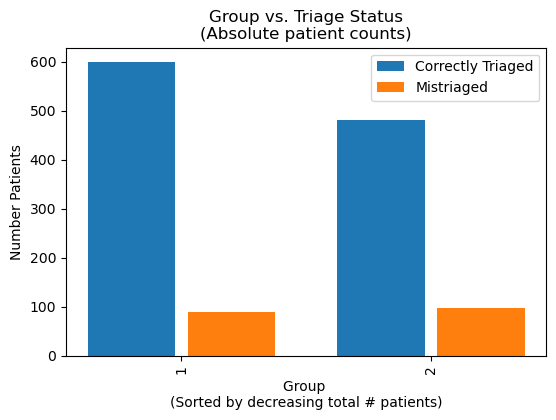

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Group    0   1  Total  Prop. Mistriaged
0              2  482  97    579           0.16753
1              1  599  89    688           0.12936


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.148445
std                0.026990
min                0.129360
25%                0.138903
50%                0.148445
75%                0.157988
max                0.167530

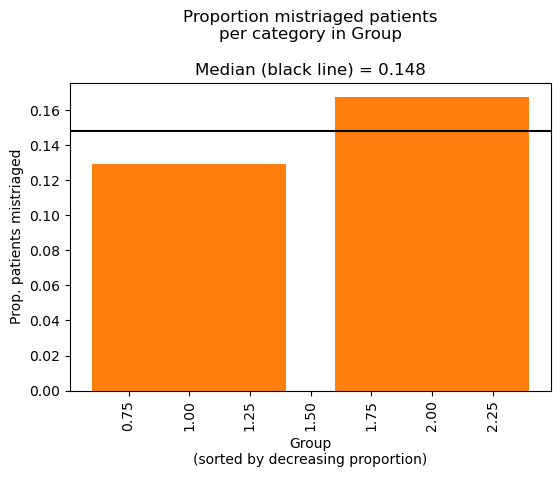




********************************************************************************
Sex
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Sex    0   1  Total
0            2  569  92    661
1            1  512  94    606

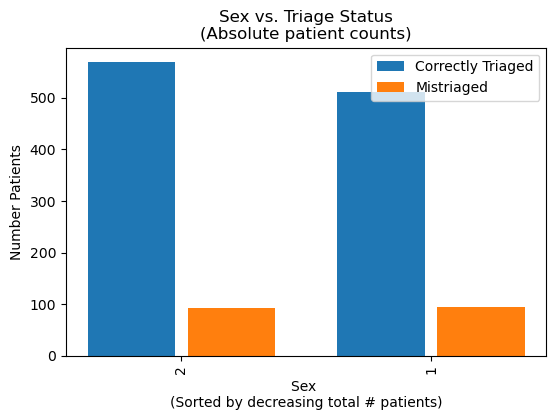

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Sex    0   1  Total  Prop. Mistriaged
0            1  512  94    606          0.155116
1            2  569  92    661          0.139183


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.147149
std                0.011266
min                0.139183
25%                0.143166
50%                0.147149
75%                0.151132
max                0.155116

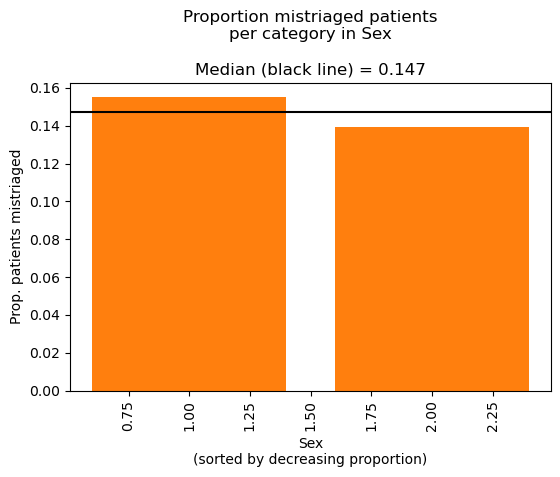




********************************************************************************
Arrival mode
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Arrival mode    0    1  Total
0                     3  653  100    753
1                     2  229   37    266
2                     4  123   32    155
3                     1   65   14     79
4                     6    8    2     10
5                     5    1    1      2
6                     7    2    0      2

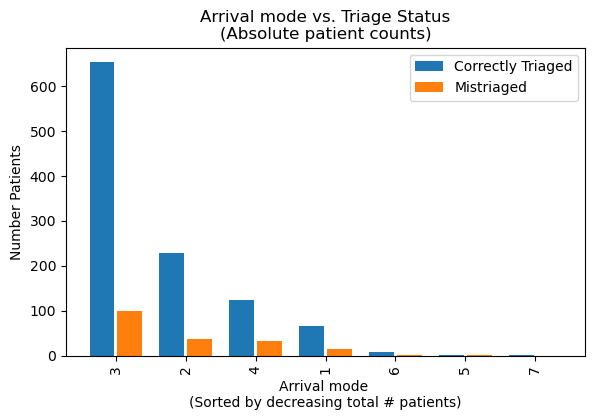

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Arrival mode    0    1  Total  Prop. Mistriaged
0                     5    1    1      2          0.500000
1                     4  123   32    155          0.206452
2                     6    8    2     10          0.200000
3                     1   65   14     79          0.177215
4                     2  229   37    266          0.139098
5                     3  653  100    753          0.132802
6                     7    2    0      2          0.000000


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              7.000000
mean               0.193652
std                0.151934
min                0.000000
25%                0.135950
50%                0.177215
75%                0.203226
max                0.500000

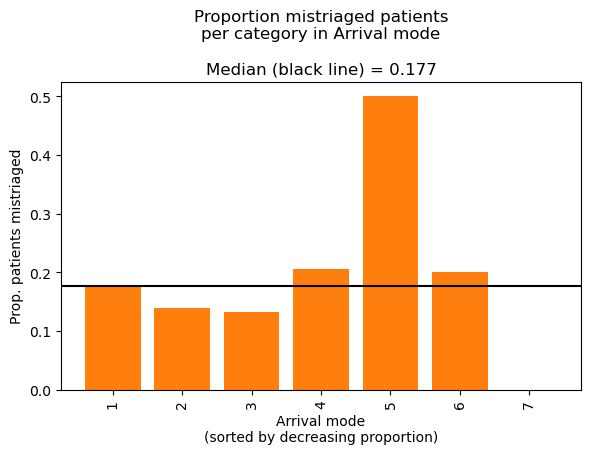




********************************************************************************
Injury
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Injury    0    1  Total
0               1  864  159   1023
1               2  217   27    244

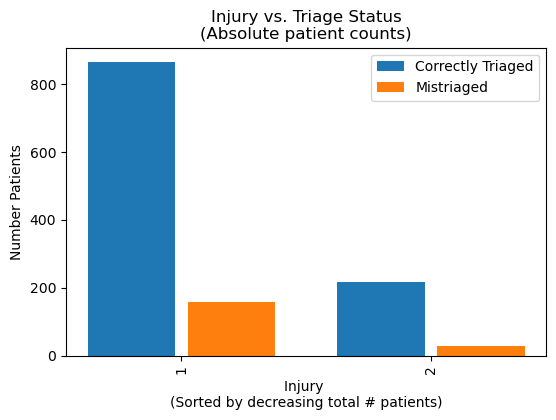

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Injury    0    1  Total  Prop. Mistriaged
0               1  864  159   1023          0.155425
1               2  217   27    244          0.110656


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.133040
std                0.031657
min                0.110656
25%                0.121848
50%                0.133040
75%                0.144233
max                0.155425

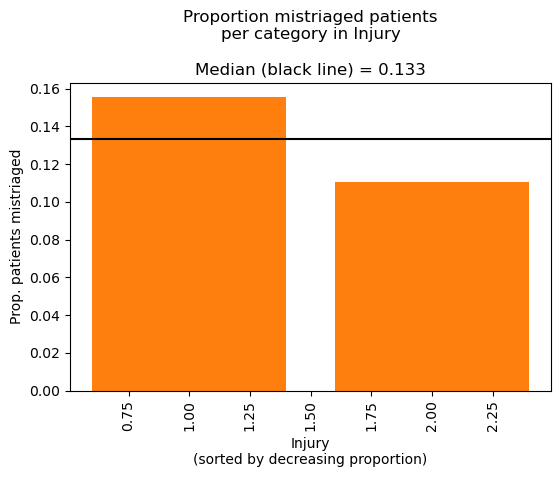




********************************************************************************
Chief_complain
********************************************************************************

===> Top 10 based on total number of patients


mistriage    Chief_complain   0   1  Total
0                  abd pain  68   4     72
1                   dyspnea  48  12     60
2                 dizziness  56   3     59
3                     fever  33  12     45
4           ant. chest pain  43   1     44
5                Open Wound  29   2     31
6                  headache  24   6     30
7           epigastric pain  17   5     22
8             mental change  18   4     22
9          general weakness  16   5     21

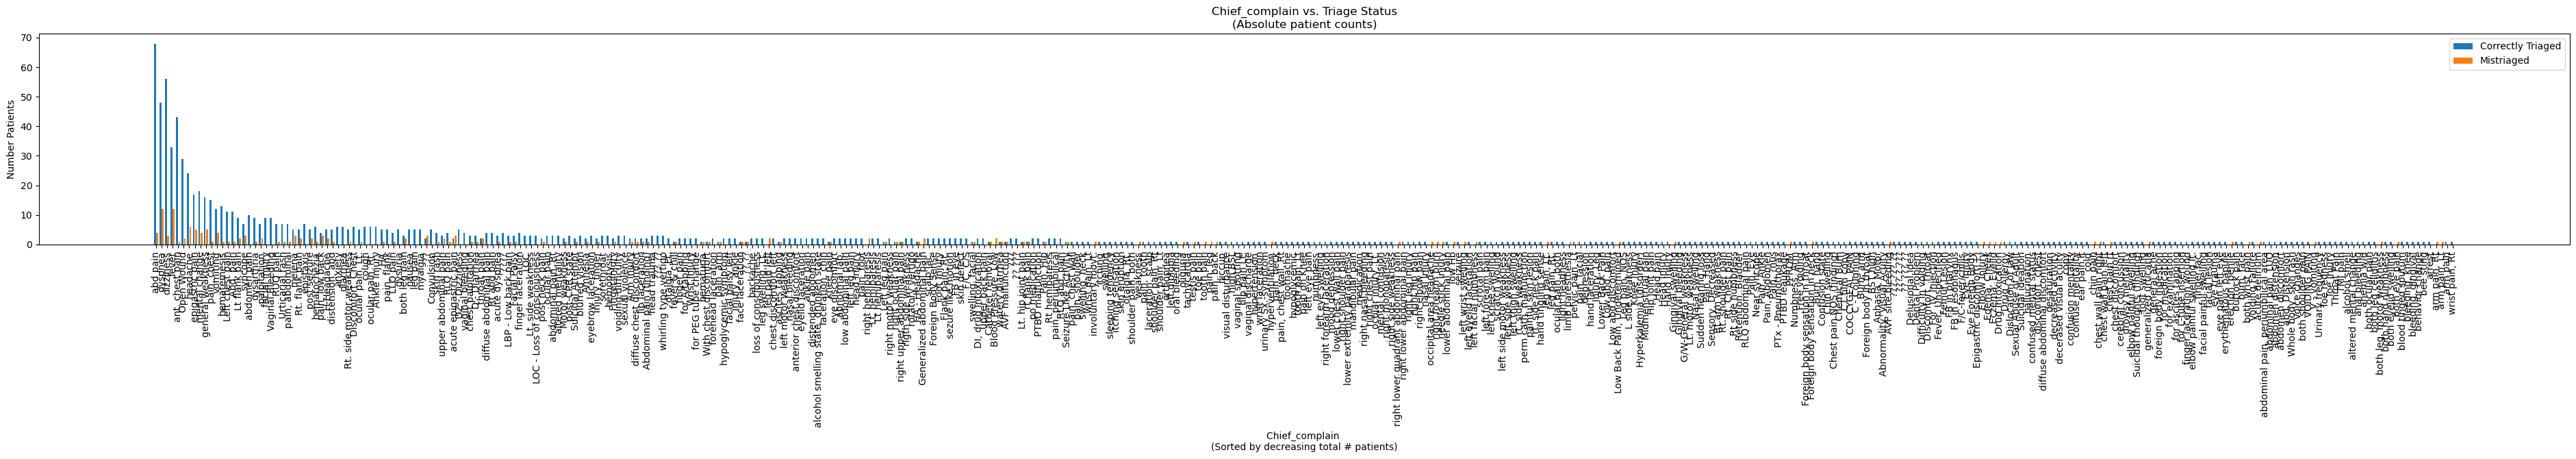

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage            Chief_complain  0  1  Total  Prop. Mistriaged
0             chest wall pain right  0  1      1               1.0
1          both leg  motor weakness  0  1      1               1.0
2                          oliguria  0  1      1               1.0
3                            low Hb  0  1      1               1.0
4               needle stick injury  0  1      1               1.0
5                 Drug Intoxication  0  1      1               1.0
6                right forearm burn  0  1      1               1.0
7           occipital area headache  0  1      1               1.0
8                 Gingival swelling  0  1      1               1.0
9                     both eye pain  0  1      1               1.0


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count            417.000000
mean               0.156812
std                0.313548
min                0.000000
25%                0.000000
50%                0.000000
75%                0.142857
max                1.000000

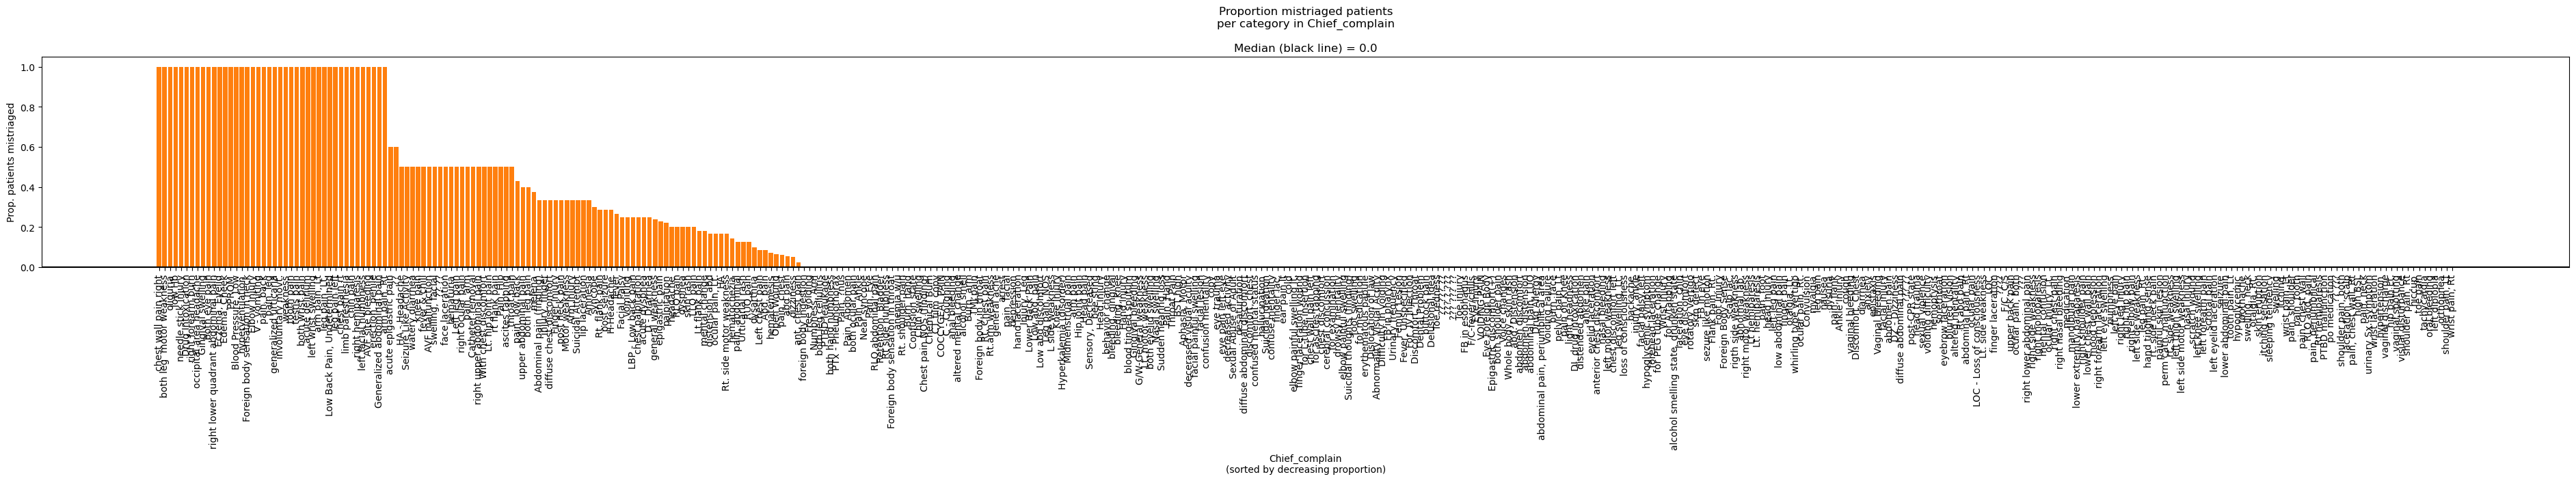




********************************************************************************
Mental
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Mental     0    1  Total
0               1  1019  168   1187
1               2    31    8     39
2               3    19    9     28
3               4    12    1     13

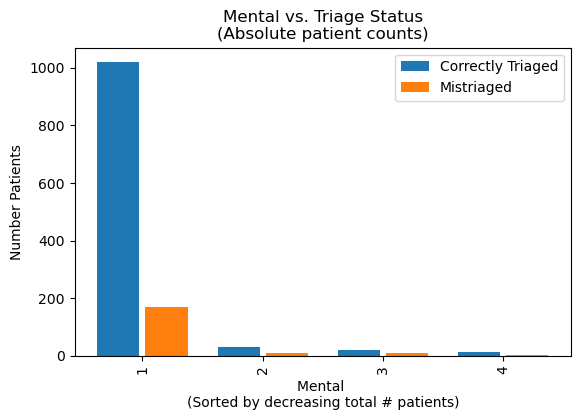

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Mental     0    1  Total  Prop. Mistriaged
0               3    19    9     28          0.321429
1               2    31    8     39          0.205128
2               1  1019  168   1187          0.141533
3               4    12    1     13          0.076923


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              4.000000
mean               0.186253
std                0.104214
min                0.076923
25%                0.125381
50%                0.173331
75%                0.234203
max                0.321429

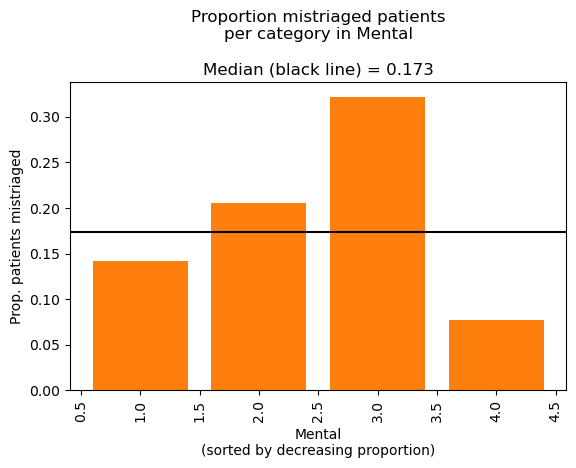




********************************************************************************
Pain
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Pain    0    1  Total
0             1  608  106    714
1             0  473   80    553

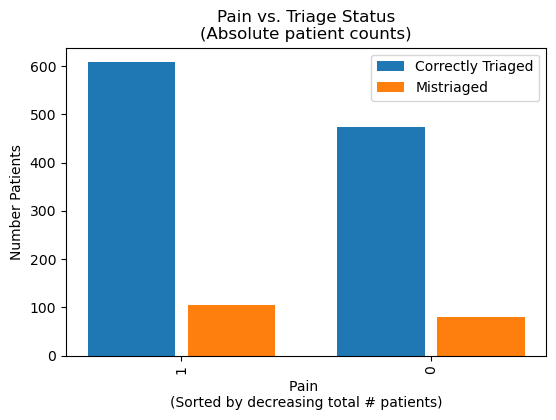

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Pain    0    1  Total  Prop. Mistriaged
0             1  608  106    714          0.148459
1             0  473   80    553          0.144665


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.146562
std                0.002683
min                0.144665
25%                0.145614
50%                0.146562
75%                0.147511
max                0.148459

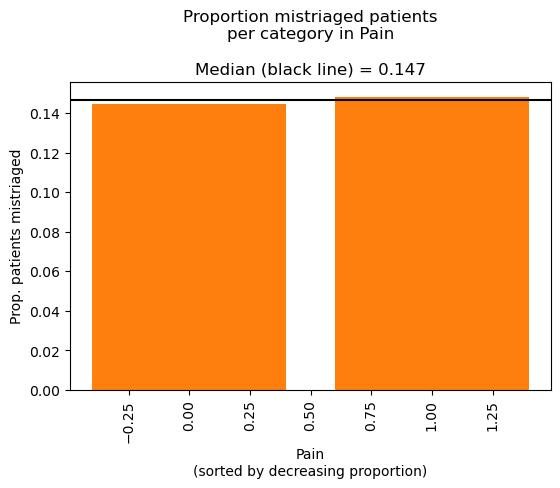




********************************************************************************
NRS_pain
********************************************************************************

===> Top 10 based on total number of patients


mistriage  NRS_pain    0   1  Total
0                 0  473  80    553
1                 3  253  25    278
2                 4  113  28    141
3                 5  114  22    136
4                 6   58  12     70
5                 2   34   7     41
6                 7   29   4     33
7                 8    4   5      9
8                10    2   1      3
9                 1    1   1      2

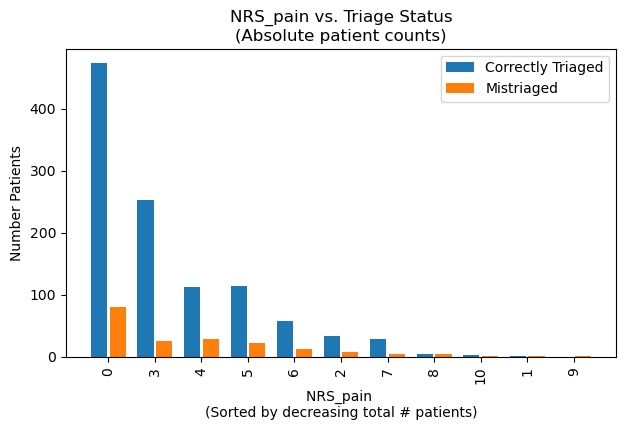

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  NRS_pain    0   1  Total  Prop. Mistriaged
0                 9    0   1      1          1.000000
1                 8    4   5      9          0.555556
2                 1    1   1      2          0.500000
3                10    2   1      3          0.333333
4                 4  113  28    141          0.198582
5                 6   58  12     70          0.171429
6                 2   34   7     41          0.170732
7                 5  114  22    136          0.161765
8                 0  473  80    553          0.144665
9                 7   29   4     33          0.121212


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count             11.000000
mean               0.313382
std                0.275193
min                0.089928
25%                0.153215
50%                0.171429
75%                0.416667
max                1.000000

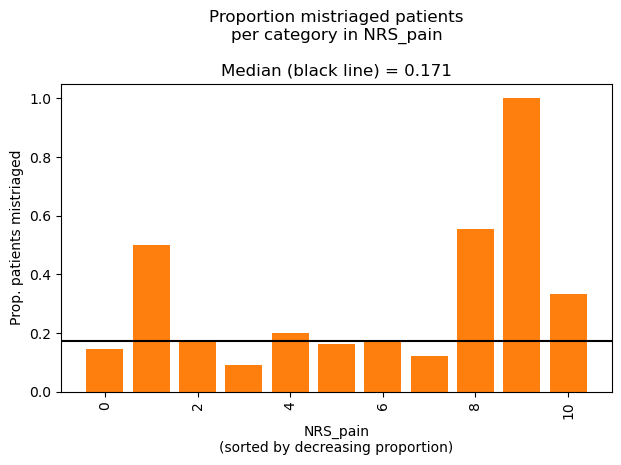




********************************************************************************
KTAS_RN
********************************************************************************

===> Top 10 based on total number of patients


mistriage  KTAS_RN    0   1  Total
0                4  420  81    501
1                3  400  47    447
2                2  183  31    214
3                5   63  24     87
4                1   15   3     18

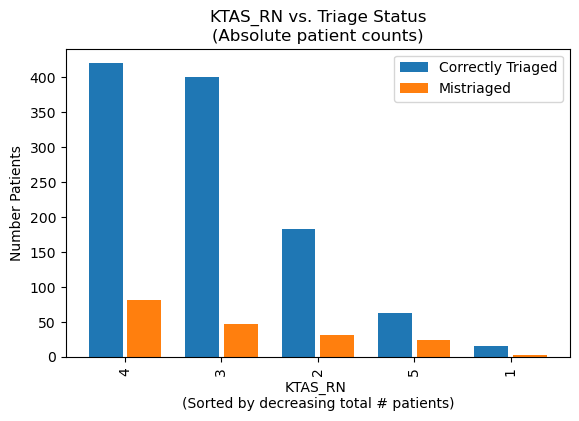

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  KTAS_RN    0   1  Total  Prop. Mistriaged
0                5   63  24     87          0.275862
1                1   15   3     18          0.166667
2                4  420  81    501          0.161677
3                2  183  31    214          0.144860
4                3  400  47    447          0.105145


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              5.000000
mean               0.170842
std                0.063486
min                0.105145
25%                0.144860
50%                0.161677
75%                0.166667
max                0.275862

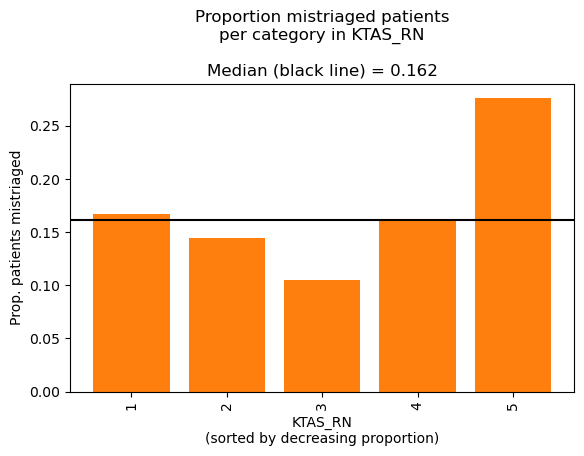




********************************************************************************
Diagnosis in ED
********************************************************************************

===> Top 10 based on total number of patients


mistriage                            Diagnosis in ED   0  1  Total
0                              Acute gastroenteritis  45  4     49
1                                           Headache  21  5     26
2                         Unspecified abdominal pain  17  6     23
3                               Ischaemic chest pain  20  1     21
4                                          Dizziness  18  2     20
5            Open wound of other parts of head, face  19  1     20
6                                    Unstable angina  15  2     17
7                            Dizziness and giddiness  14  1     15
8          Gastrointestinal haemorrhage, unspecified  12  3     15
9                                       Ureter stone  13  0     13

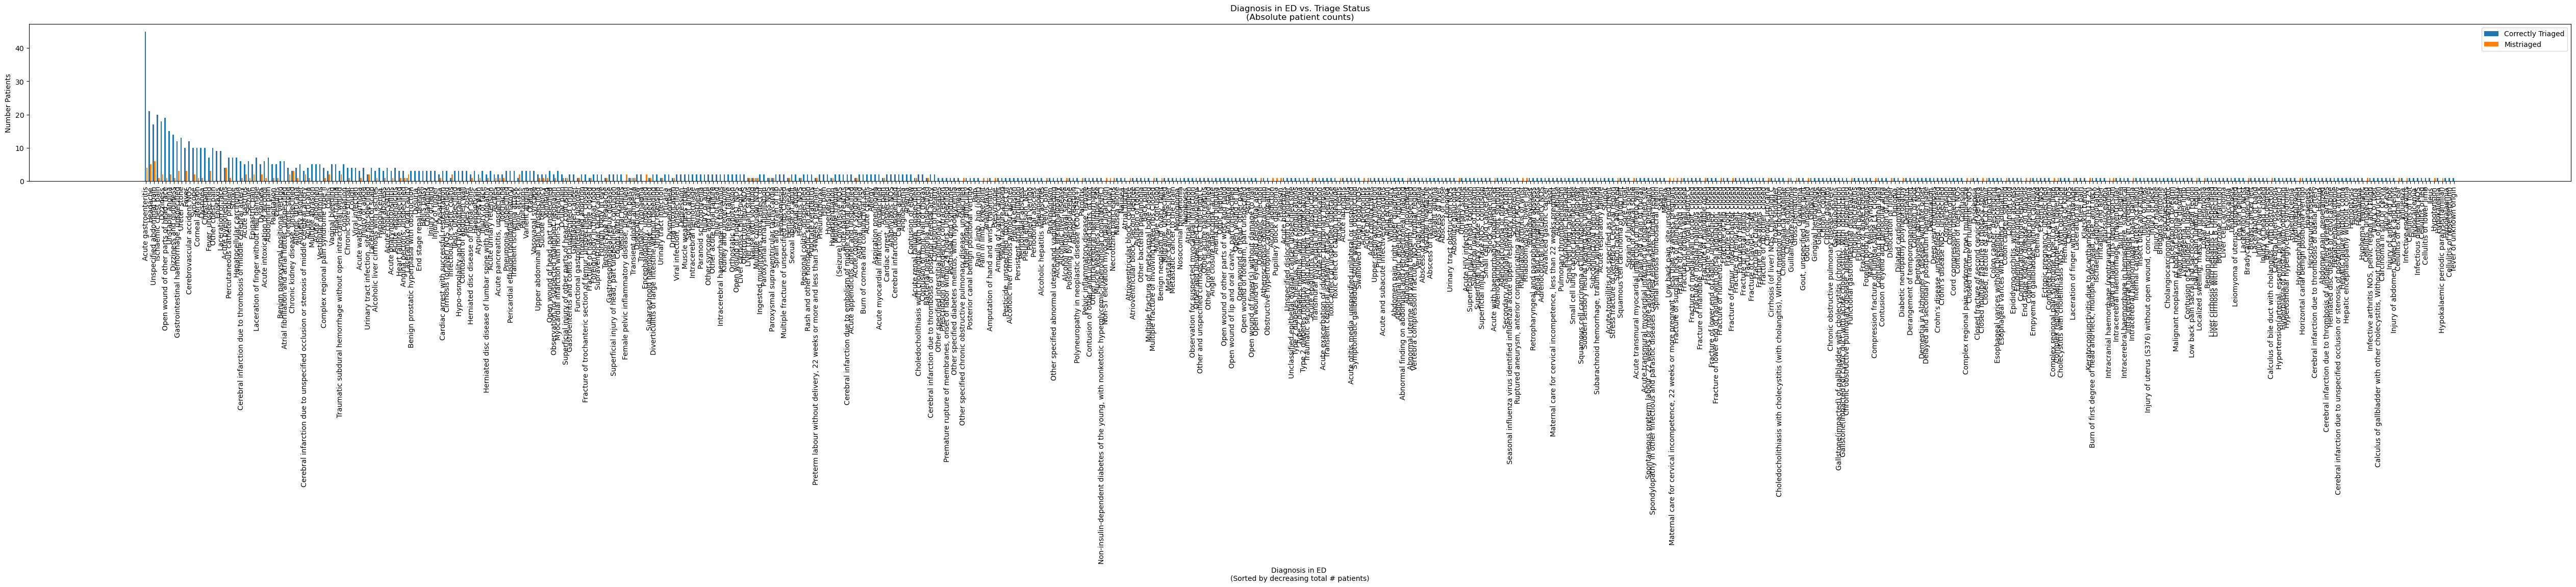

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage                                       Diagnosis in ED  0  1  Total  \
0                                  Community-acquired pneumonia  0  1      1   
1                        Non-ST elevation myocardial infarction  0  1      1   
2                                            Chronic alcoholism  0  1      1   
3                                               Gross hematuria  0  1      1   
4                                      Sprain of cervical spine  0  1      1   
5              Complex regional pain syndrome, type I lower leg  0  1      1   
6                                             Acute peritonitis  0  1      1   
7                                    Hydrocephalus, unspecified  0  1      1   
8                                             Acute pharyngitis  0  1      1   
9          Complex regional pain syndrome type II of lower limb  0  1      1   

mistriage  Prop. Mistriaged  
0                       1.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       1.0  
5                       1.0  
6                       1.0  
7                       1.0  
8                       1.0  
9                       1.0


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count            583.000000
mean               0.163076
std                0.332356
min                0.000000
25%                0.000000
50%                0.000000
75%                0.023810
max                1.000000

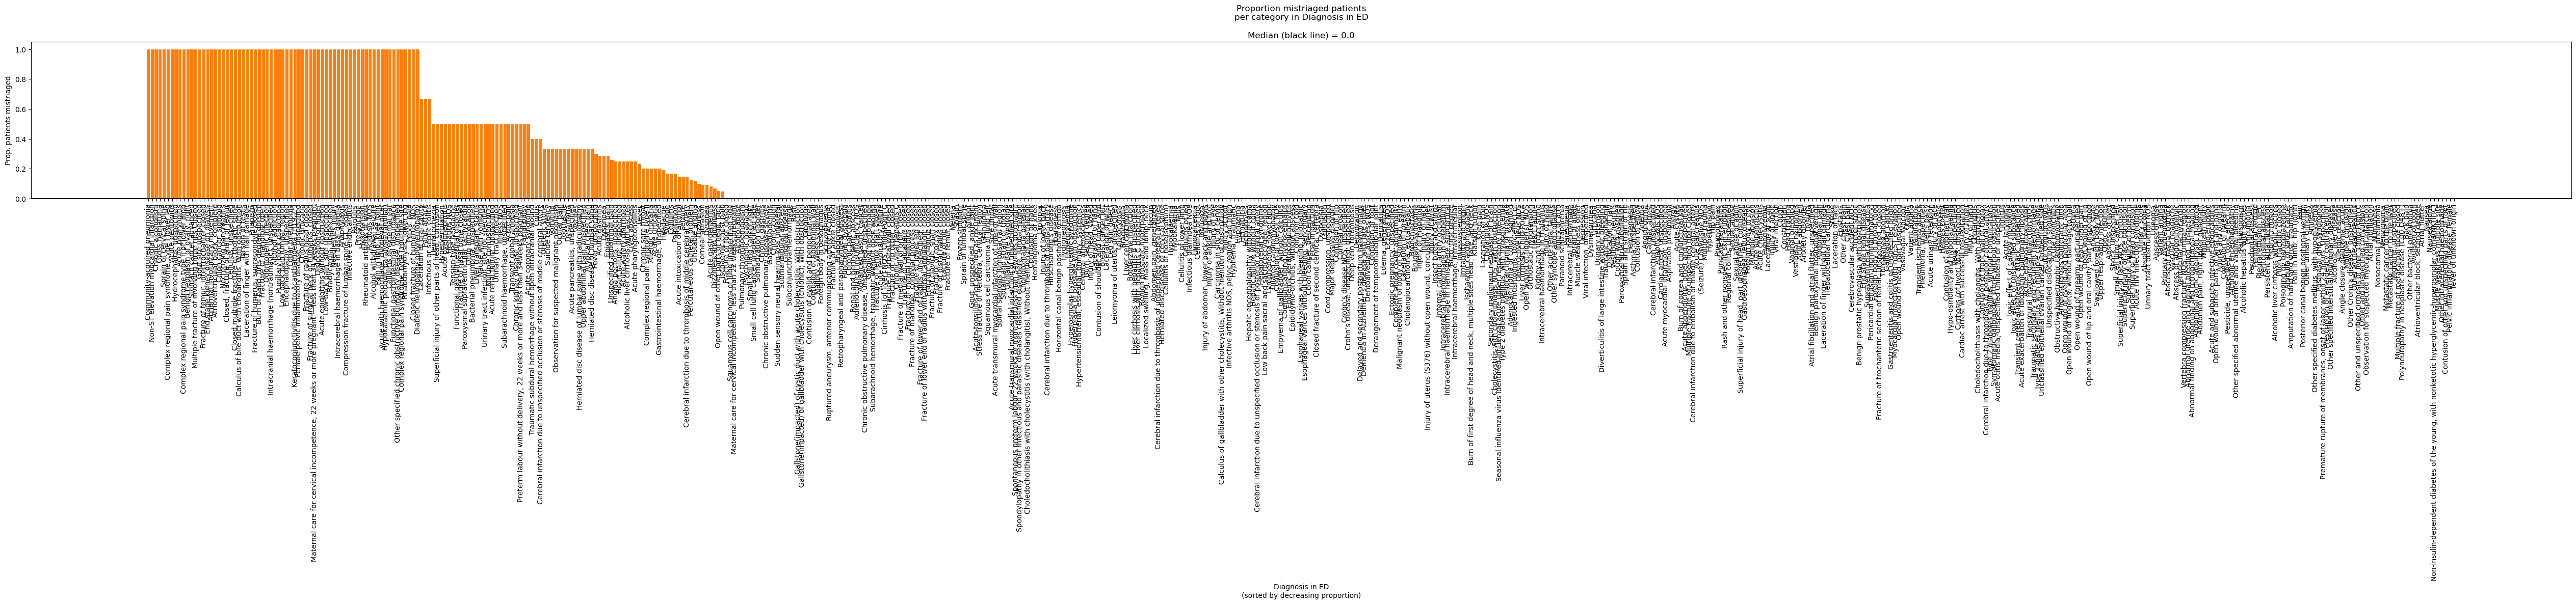




********************************************************************************
Disposition
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Disposition    0    1  Total
0                    1  684  113    797
1                    2  320   53    373
2                    5   23    9     32
3                    4   23    3     26
4                    7   19    3     22
5                    6    8    1      9
6                    3    4    4      8

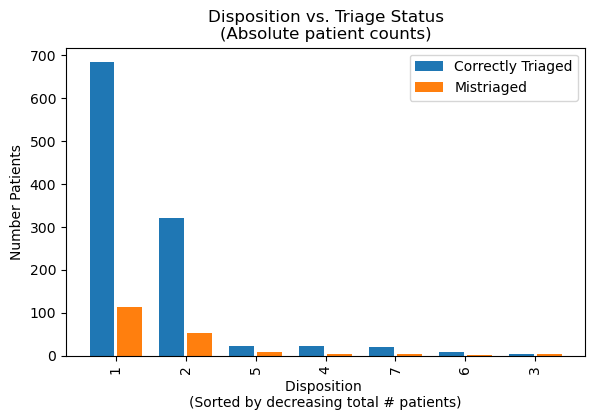

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Disposition    0    1  Total  Prop. Mistriaged
0                    3    4    4      8          0.500000
1                    5   23    9     32          0.281250
2                    2  320   53    373          0.142091
3                    1  684  113    797          0.141782
4                    7   19    3     22          0.136364
5                    4   23    3     26          0.115385
6                    6    8    1      9          0.111111


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              7.000000
mean               0.203997
std                0.142795
min                0.111111
25%                0.125874
50%                0.141782
75%                0.211671
max                0.500000

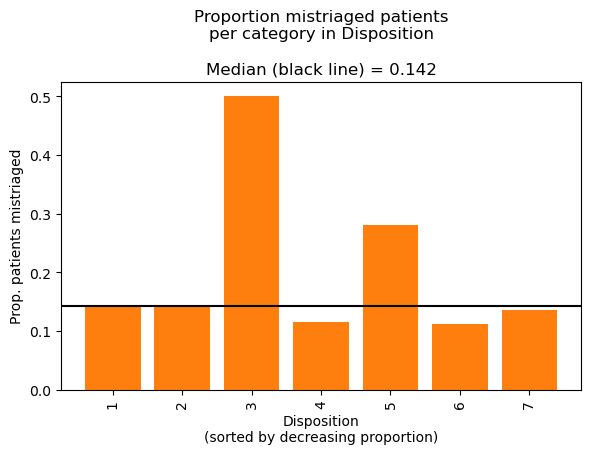




********************************************************************************
KTAS_expert
********************************************************************************

===> Top 10 based on total number of patients


mistriage  KTAS_expert    0   1  Total
0                    3  400  87    487
1                    4  420  39    459
2                    2  183  37    220
3                    5   63  12     75
4                    1   15  11     26

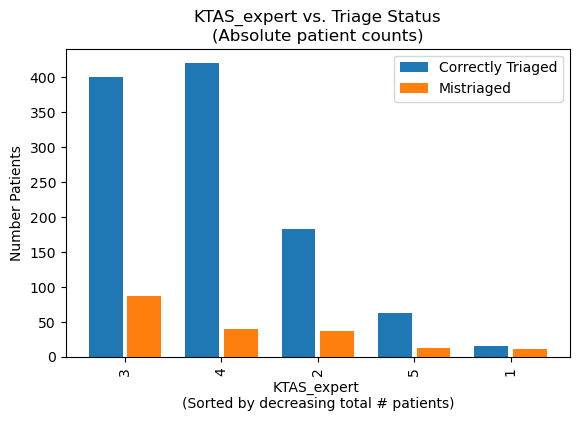

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  KTAS_expert    0   1  Total  Prop. Mistriaged
0                    1   15  11     26          0.423077
1                    3  400  87    487          0.178645
2                    2  183  37    220          0.168182
3                    5   63  12     75          0.160000
4                    4  420  39    459          0.084967


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              5.000000
mean               0.202974
std                0.128472
min                0.084967
25%                0.160000
50%                0.168182
75%                0.178645
max                0.423077

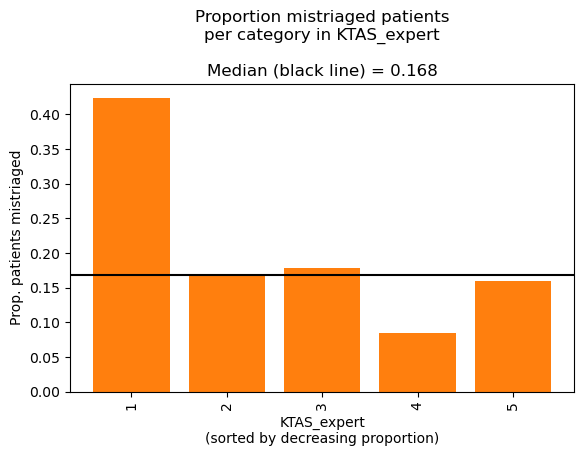




********************************************************************************
Error_group
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Error_group     0   1  Total
0                    0  1081   0   1081
1                    4     0  64     64
2                    2     0  47     47
3                    1     0  22     22
4                    5     0  13     13
5                    6     0   9      9
6                    7     0   9      9
7                    8     0   9      9
8                    9     0   7      7
9                    3     0   6      6

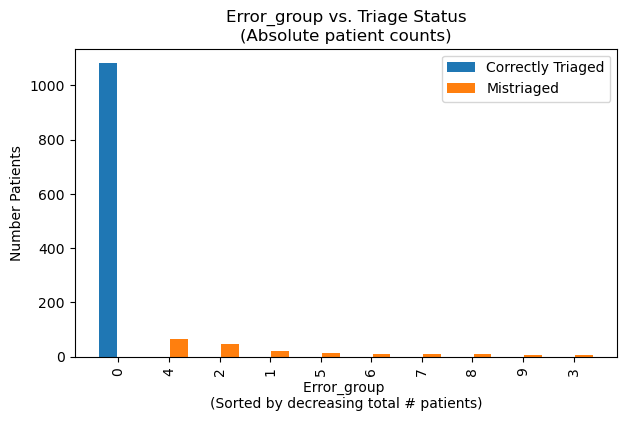

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Error_group     0   1  Total  Prop. Mistriaged
0                    4     0  64     64               1.0
1                    2     0  47     47               1.0
2                    1     0  22     22               1.0
3                    5     0  13     13               1.0
4                    6     0   9      9               1.0
5                    7     0   9      9               1.0
6                    8     0   9      9               1.0
7                    9     0   7      7               1.0
8                    3     0   6      6               1.0
9                    0  1081   0   1081               0.0


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count             10.000000
mean               0.900000
std                0.316228
min                0.000000
25%                1.000000
50%                1.000000
75%                1.000000
max                1.000000

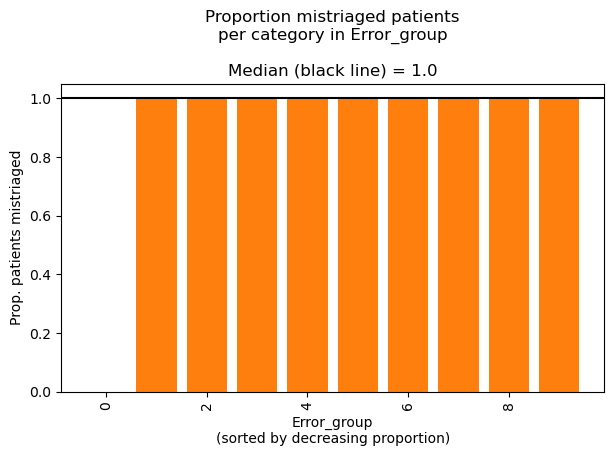

In [34]:
# Plot for each category
for cat in categories:
    print("\n\n\n" + "*" * 80)
    print(cat)
    print("*" * 80)
    
    # make sure column is a string
    # some categorical variables, like year or day of week, are entered as numbers, but are continuous variables
    # merged[cat] = merged[cat].astype("str")
    
    # obtain absolute counts of mistriaged (1=True) and not mistriaged (0=False) patients across categories within variable
    # sort by high to low total patients within categories
    counts = pd.crosstab(df[cat], df['mistriage']).reset_index()
    counts['Total'] = counts[True] + counts[False]
    counts = counts.sort_values('Total', ascending = False)
    print("\n===> Top 10 based on total number of patients")
    display(counts.head(10).reset_index(drop = True))
    
    # plot absolute counts as a grouped barplot
    width_of_bar = 0.35
    x = np.arange(counts.shape[0])
    plt.figure(figsize = (6 + (0.1 * counts.shape[0]), 4))
    plt.bar(x-0.2, counts[False], width_of_bar)
    plt.bar(x+0.2, counts[True], width_of_bar)
    plt.xticks(x, counts[cat])
    plt.ylabel("Number Patients")
    plt.legend(["Correctly Triaged", "Mistriaged"])
    plt.title(cat + " vs. Triage Status\n(Absolute patient counts)")
    plt.xlabel(cat + " \n(Sorted by decreasing total # patients)")
    plt.xticks(rotation = 90)
    plt.show()
    print("-" * 90)
    
    # calculate proportion of mistriaged patients within categories of variable
    # sort by decreasing proportion
    counts["Prop. Mistriaged"] = counts[True] / counts["Total"]
    counts = counts.sort_values("Prop. Mistriaged", ascending = False)
    med = counts["Prop. Mistriaged"].median()
    print("\n===> Top 10 based on proportion mistriaged patients")
    display(counts.head(10).reset_index(drop = True))
    print("\n===> Summary statstics of proportion mistriaged patients")
    display(counts[["Prop. Mistriaged"]].describe())
    
    # plot proportion pateints mistriaged
    plt.figure(figsize = (6 + (0.1 * counts.shape[0]), 4))
    plt.bar(x = counts[cat], height = counts["Prop. Mistriaged"], color ="#ff7f0e")
    plt.ylabel("Prop. patients mistriaged")
    plt.title("Proportion mistriaged patients\nper category in " + cat + "\n\nMedian (black line) = " + str(round(med,3)))
    plt.axhline(med, c = "black")
    plt.xlabel(cat + "\n(sorted by decreasing proportion)")
    plt.xticks(rotation = 90)
    plt.show()